<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_Fracionado_teste_007_nov_14_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.7MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4264047 sha256=1e45245cae35148a6ea9d627fd9de5ab7b46ac55c3bf58af2fd79841eed79d13
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
%matplotlib inline

In [4]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

--2019-11-15 01:26:54--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip’

quadrado_v2.zip     100%[===================>]  21.76M  5.16MB/s    in 5.1s    

2019-11-15 01:27:00 (4.23 MB/s) - ‘quadrado_v2.zip’ saved [22819538/22819538]



In [0]:
#!ls

In [0]:
Size=400 # tamanho da foto
Sub_Size=32 # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='quadrado_v2.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [8]:
print(file_name)

<zipfile.ZipFile filename='quadrado_v2.zip' mode='r'>


--2019-11-15 01:27:02--  http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22819538 (22M) [application/zip]
Saving to: ‘quadrado_v2.zip.1’

quadrado_v2.zip.1   100%[===================>]  21.76M  5.13MB/s    in 5.2s    

2019-11-15 01:27:08 (4.22 MB/s) - ‘quadrado_v2.zip.1’ saved [22819538/22819538]



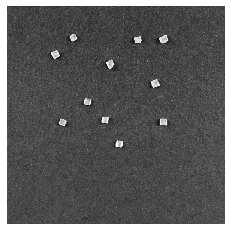

In [9]:
!wget http://ftp.feq.ufu.br/ubirajara/quadrado_v2.zip

file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()
# all images are load in variable x...
FILE=Transfere
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0], cmap = "gray")

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [11]:
#foto 0 (k=0)
k=0
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
Cada_foto=[]
Posicao_X=[]
Posicao_Y=[]
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    for i in range(Sub_Size):
      Posicao_X.append(Crop+i)
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
        Posicao_Y.append(j+k)

    WW=np.copy(p) 
    Cada_foto.append(WW.ravel())
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)
#print(Cada_foto)

          ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0    0.002168   91.399364  0.128243  ...     4.318275 -0.109785  0.809167
1    0.002158   91.638211  0.125520  ...     4.321343 -0.109717  0.809004
2    0.002155   91.189923  0.130312  ...     4.317820 -0.110578  0.811038
3    0.002127   91.501935  0.135778  ...     4.319669 -0.111106  0.812558
4    0.002134   91.130796  0.129310  ...     4.314509 -0.108983  0.807754
..        ...         ...       ...  ...          ...       ...       ...
364  0.002069  103.863578  0.139679  ...     4.391360 -0.123418  0.838740
365  0.002075  103.728595  0.132513  ...     4.392052 -0.121965  0.835891
366  0.002073  104.496203  0.127919  ...     4.394680 -0.121576  0.835189
367  0.002057  104.826255  0.133261  ...     4.398572 -0.120980  0.834285
368  0.002047  106.596961  0.121630  ...     4.408716 -0.120327  0.833056

[369 rows x 13 columns]


In [12]:
print(np.max(Posicao_X))
print(np.min(Posicao_X))

231
200


In [13]:
print(np.max(Posicao_Y))
print(np.min(Posicao_Y))

399
0


In [14]:
print(np.array(Cada_foto).shape)

(369, 1024)


In [15]:
print(np.array(GLCM).shape)
print(Mahotas)

(13,)
        ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0  0.002039  104.943548  0.131367  ...     4.391450 -0.121856  0.835867
1  0.002048  113.858481  0.059526  ...     4.471004 -0.119888  0.832319
2  0.002079   92.904234  0.241705  ...     4.300419 -0.124558  0.840803
3  0.002023  114.681582  0.053923  ...     4.471990 -0.115007  0.823236

[4 rows x 13 columns]


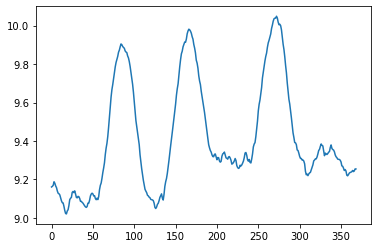

In [16]:
plt.plot(x_ref,df['entropy'])

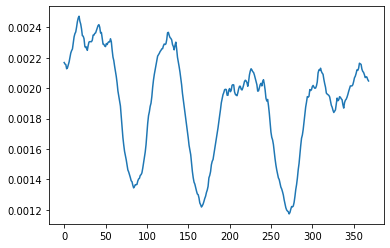

In [17]:
plt.plot(x_ref,df['ASM'])

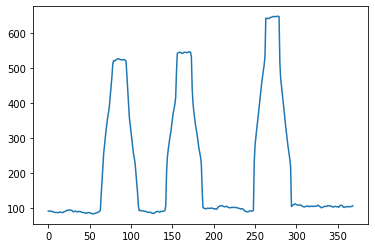

In [18]:
plt.plot(x_ref,df['constrast'])   

509.94278420915714


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


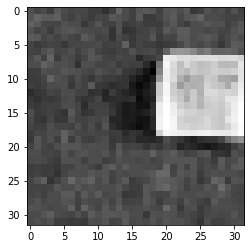

In [19]:
Num=np.argmax(df['constrast'])
Posicao=int(Num-Sub_Size/2)
plt.imshow(Cada_foto[Posicao].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[Posicao]) 

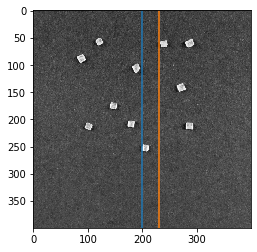

In [20]:
xv_min=[]
xv_max=[]
yv=[]
MAX_X=np.max(Posicao_X)
MIN_X=np.min(Posicao_X)
for i in range(400):
  xv_min.append(MIN_X)
  xv_max.append(MAX_X)
  yv.append(i)
plt.imshow(ww[0], cmap = "gray")
plt.plot(xv_min,yv)
plt.plot(xv_max,yv)


89.57645031217481


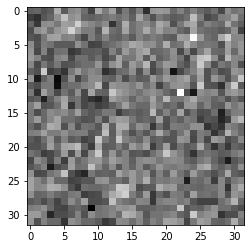

In [21]:
n=5
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])  


86.6014974635796


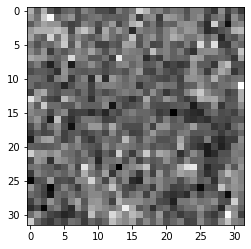

In [22]:
n=50
plt.imshow(Cada_foto[n].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[n])

In [23]:
np.array(Cada_foto).shape

(369, 1024)

86.6014974635796


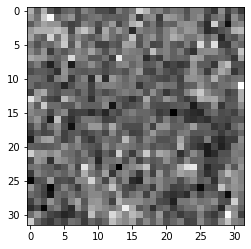

In [24]:
plt.imshow(Cada_foto[50].reshape(Sub_Size,Sub_Size), cmap = "gray")
print(np.array(df['constrast'])[50])  

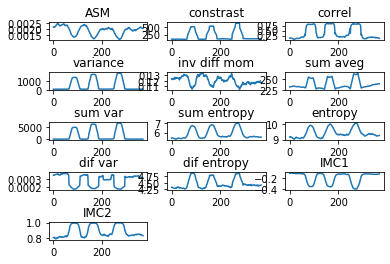

In [25]:

for i in range(1, 14):
    plt.subplot(5, 3, i)
    plt.plot(x_ref,df[Nomes[i-1]])
    plt.subplots_adjust(hspace = 1.8)
    #fig.tight_layout() 
    plt.title(Nomes[i-1])
    #plt.ylabel(Nomes[i-1])



    #plt.text(0.5, 0.5,Nomes[i-1]),fontsize=18, ha='center')